In [105]:
import gnureadline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import signal
COLOR_PALETTE = [    
               "#348ABD",
               "#A60628",
               "#7A68A6",
               "#467821",
               "#CF4457",
               "#188487",
               "#E24A33"
              ]


In [296]:
parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv("../sorted.csv", nrows=120000, parse_dates=[1], date_parser=parser, index_col=0)

In [19]:
def findDateIndex(date):
    # start date of first full day of observations in the data
    start_date = dt.date(2006, 12, 17)
    #how many days have passed between start date and input date
    days = (date - start_date).days

    # return the index: 60 obs/minute; 1440 obs/day
    # we return the csv row where our input date occurs
    return days*1440

In [37]:
def getChunk(start_date, len_days, csv_name):

    idx = findDateIndex(start_date)
    chunk = data.iloc[idx:idx+(1440*len_days), 1:2]

    #chunk.to_csv(csv_name, header=False,index=False)

    chunk = chunk.as_matrix()
    chunk = chunk.reshape(chunk.shape[0],)
    
    return chunk

In [301]:
x = getChunk(dt.date(2007, 2, 12), 7, 'test')

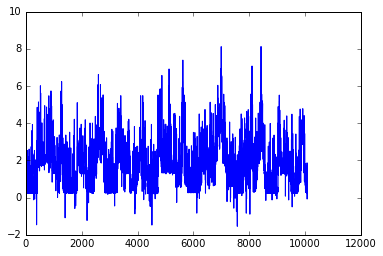

In [302]:
plt.plot(x)
plt.show()

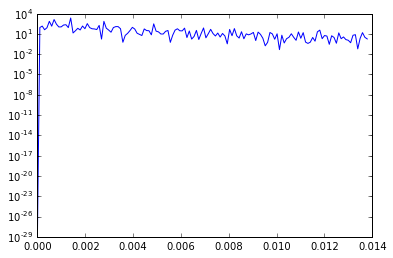

In [303]:
f, P = signal.periodogram(x)
plt.semilogy(f[0:140], P[0:140])
plt.show()

In [58]:
m = np.argmax(P)

In [74]:
period = 1/f[670]
period
period/60

0.1678358208955224

In [304]:
def bandpass_filter(x, freq, frequency_of_signal, band = 0.005):
    if (frequency_of_signal - band) < abs(freq) < (frequency_of_signal + band):
        return x
    else:
        return 0


In [305]:
sample_time = 1
fft_of_signal_with_noise = np.fft.fft(x)
f = np.fft.fftfreq(len(fft_of_signal_with_noise),sample_time)

In [306]:
F_filtered = np.asanyarray([bandpass_filter(x,freq,0.001) for x,freq in zip(fft_of_signal_with_noise, f)]);
filtered_signal = np.fft.ifft(F_filtered);

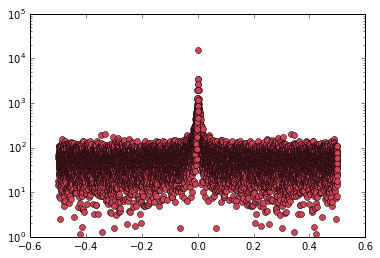

In [307]:
plt.semilogy(f, abs(fft_of_signal_with_noise), 'o', c=COLOR_PALETTE[4]);
plt.show()

/Users/JRod/Library/Python/3.5/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


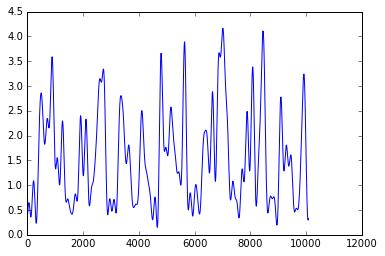

In [311]:
plt.plot(np.arange(10080), filtered_signal)
plt.show()

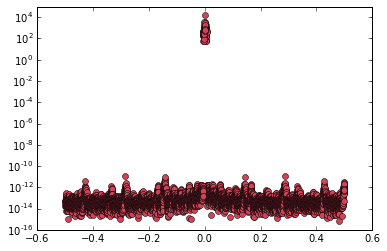

In [312]:
plt.semilogy(f, abs(np.fft.fft(filtered_signal)), 'o', c=COLOR_PALETTE[4]);
plt.show()

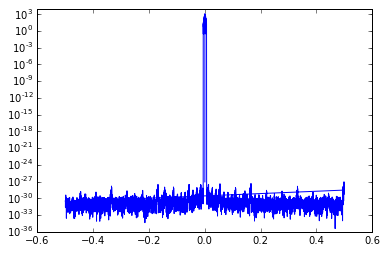

In [313]:
f, P = signal.periodogram(filtered_signal)
plt.semilogy(f, P)
plt.show()

In [314]:
P


array([  8.73233425e-28,   4.34653449e+01,   7.12666600e+01, ...,
         2.05265277e+01,   7.12666600e+01,   4.34653449e+01])

In [326]:
n = np.argwhere(P>80)
period = 1/f[n]
period/60

array([[ 33.6       ],
       [ 24.        ],
       [ 21.        ],
       [ 15.27272727],
       [ 14.        ],
       [ 12.        ],
       [  8.        ],
       [  6.46153846],
       [  6.        ],
       [  3.42857143],
       [ -3.42857143],
       [ -6.        ],
       [ -6.46153846],
       [ -8.        ],
       [-12.        ],
       [-14.        ],
       [-15.27272727],
       [-21.        ],
       [-24.        ],
       [-33.6       ]])

In [320]:
x2 = getChunk(dt.date(2007, 2, 19), 7, 'test')

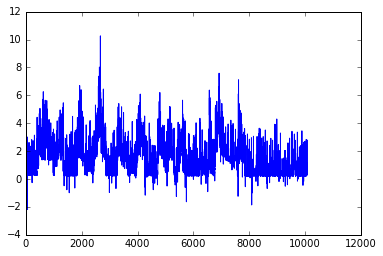

In [330]:
plt.plot(x2)
plt.show()

In [321]:
sample_time = 1
fft_of_signal_with_noise = np.fft.fft(x2)
f = np.fft.fftfreq(len(fft_of_signal_with_noise),sample_time)

F_filtered = np.asanyarray([bandpass_filter(x,freq,0.001) for x,freq in zip(fft_of_signal_with_noise, f)]);
filtered_signal = np.fft.ifft(F_filtered);

In [322]:
filtered_signal.shape

(10080,)

/Users/JRod/Library/Python/3.5/lib/python/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


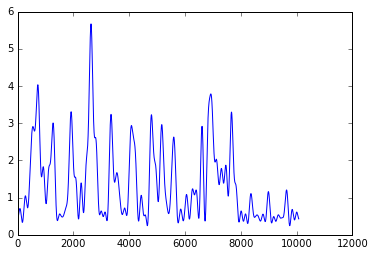

In [324]:
plt.plot(np.arange(10080), filtered_signal)
plt.show()

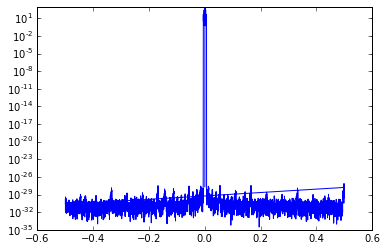

In [328]:
f, P = signal.periodogram(filtered_signal)
plt.semilogy(f, P)
plt.show()

In [329]:
n = np.argwhere(P>80)
period = 1/f[n]
period/60

array([[ 168.        ],
       [  84.        ],
       [  56.        ],
       [  42.        ],
       [  33.6       ],
       [  28.        ],
       [  24.        ],
       [  16.8       ],
       [  14.        ],
       [  12.92307692],
       [  12.        ],
       [  11.2       ],
       [  10.5       ],
       [   6.        ],
       [  -6.        ],
       [ -10.5       ],
       [ -11.2       ],
       [ -12.        ],
       [ -12.92307692],
       [ -14.        ],
       [ -16.8       ],
       [ -24.        ],
       [ -28.        ],
       [ -33.6       ],
       [ -42.        ],
       [ -56.        ],
       [ -84.        ],
       [-168.        ]])